# A very terse streaming demonstration

One way to implement streaming in python is with generators

In [86]:
import numpy as np
%matplotlib notebook
import time
import matplotlib.pyplot as plt

## Synthetic image source

In [87]:
def img_src_gen(n):
    for j in range(n):
        yield np.random.rand(10, 10)

In [88]:
isg = img_src_gen(3)

In [91]:
next(isg)

array([[ 0.43946745,  0.80338854,  0.19360922,  0.65842716,  0.81610639,
         0.40858955,  0.29961913,  0.63734582,  0.76644319,  0.95701415],
       [ 0.13324355,  0.76064089,  0.16656323,  0.17553653,  0.05894729,
         0.18702819,  0.48599067,  0.50536451,  0.35312352,  0.68664604],
       [ 0.34361866,  0.99626724,  0.84784302,  0.64185213,  0.34423178,
         0.77571834,  0.40828455,  0.66252888,  0.25559651,  0.15056828],
       [ 0.64578598,  0.79838144,  0.07571789,  0.710618  ,  0.34719787,
         0.48938205,  0.19389579,  0.89617237,  0.04246714,  0.71252768],
       [ 0.65604773,  0.90151675,  0.30318742,  0.1083705 ,  0.43826566,
         0.77053428,  0.58005145,  0.41043428,  0.84988886,  0.28407222],
       [ 0.65538055,  0.95393202,  0.07709066,  0.33821952,  0.06963371,
         0.93155723,  0.43094394,  0.21150883,  0.51423761,  0.06347365],
       [ 0.54124407,  0.30459958,  0.02462002,  0.65193811,  0.37043297,
         0.0984027 ,  0.64242085,  0.14503581

## Define some computation 'modules'

In [93]:
def threshold_gen(inp, thresh):
    for img in inp:
        yield img > thresh
        
def mean_gen(inp):
    for img in inp:
        yield np.mean(img)

In [94]:
img_src = img_src_gen(5)
binary_imgs = threshold_gen(img_src, .7)
fraction = mean_gen(binary_imgs)

In [96]:
next(fraction)

0.28999999999999998

In [97]:
list(fraction)

[0.38, 0.31, 0.37]

## define an accumlator

In [98]:
def accum_hist(inp, bins):
    acumulator = np.zeros(len(bins) - 1)
    for v in inp:
        acumulator[np.digitize(v, bins)] += 1
        time.sleep(.01) # sleeping to make it look like we are working!
        yield acumulator

In [99]:
bins = np.linspace(0, 1, 11, endpoint=True)

img_src = img_src_gen(10)
binary_imgs = threshold_gen(img_src, .7)
fraction = mean_gen(binary_imgs)
ah = accum_hist(fraction, bins)

In [100]:
for h in ah:
    print(h)

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  2.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  3.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  4.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  4.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  2.  4.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  2.  5.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  2.  6.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  2.  7.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  3.  7.  0.  0.  0.  0.  0.]


## now with plotting!

In [101]:
bins = np.linspace(0, 1, 101, endpoint=True)

img_src = img_src_gen(500)
binary_imgs = threshold_gen(img_src, .7)
fraction = mean_gen(binary_imgs)
ah = accum_hist(fraction, bins)

<IPython.core.display.Javascript object>


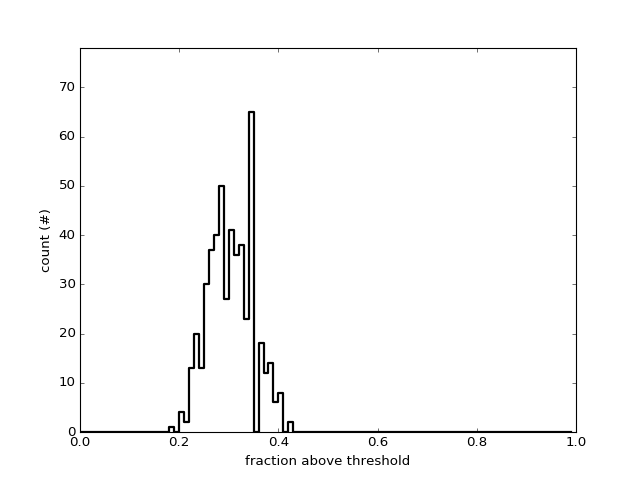

In [102]:
fig, ax = plt.subplots()
ax.set_xlabel('fraction above threshold')
ax.set_ylabel('count (#)')
ln, = ax.step(bins[:-1], np.zeros(len(bins)-1), lw=2, color='k')
for v in ah:
    ln.set_ydata(v)
    ax.set_ylim([0, np.max(v) * 1.2])
    fig.canvas.draw()
    